<a href="https://colab.research.google.com/github/kakdevedant2018/PML/blob/main/DGA_detection_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import nltk

In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
df = pd.read_csv("/content/drive/MyDrive/DGA_data/dga_data.csv")

In [111]:
df = df.dropna()

In [72]:

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
df

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.766667,10.0,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.764706,1.0,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.764706,1.0,3.572469
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,0.793103,11.0,4.444188
4,dga,jpqftymiuver,jpqftymiuver.ru,15,4,10,0.866667,1.0,3.640224
...,...,...,...,...,...,...,...,...,...
159995,legit,manhunt,manhunt.net,11,3,7,0.727273,1.0,2.845351
159996,legit,yupptv,yupptv.com,10,2,7,0.900000,1.0,3.121928
159997,legit,bbcmundo,bbcmundo.com,12,3,8,0.666667,1.0,2.918296
159998,legit,kanogames,kanogames.com,13,5,7,0.769231,1.0,3.238901


In [74]:
df=df.drop(["subclass"],axis=1)

In [75]:
df

,isDGA,domain,host
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net
4,dga,jpqftymiuver,jpqftymiuver.ru
...,...,...,...
159995,legit,manhunt,manhunt.net
159996,legit,yupptv,yupptv.com
159997,legit,bbcmundo,bbcmundo.com
159998,legit,kanogames,kanogames.com


In [ ]:
df["num_characters"]=df["host"].apply(len)

# Vowel count

In [ ]:
df['Vowels'] = df.host.str.lower().str.count(r'[aeiou]')

# consonant

In [ ]:
df['Consonant'] = df.host.str.lower().str.count(r'[a-z]') - df['Vowels']

In [ ]:
df

# Feature Generation
used to extract the features.

The linguistic features are 
1. length 
2. Meaningful word Ratio
3. Percentage of Numerical character
4. Pronounceability score
5. Percentage of length of the largest meaningful Sring
6. Levenshtein edit distance
7. Unique Character rate
8. vowel count
9. entropy


# Length
The length of the domain name |d| is an important feature.The most DGA domain have greateer length thatn normal domain thus it introduced as a feature.
As the length increases probability of being DGA domain are also increase.


# Meaningful word ratio:
It is the ratio of number of meaningful words in a domain name to the total length of the domain name.
The words in the domain name are compared to the standard meaningful word list and ratio is calculated.
DGA domain have less meaningful words than legitimate domain names.

#  Unique character rate.
It is the measure of unique characters and if lower unique character rate implies a DGA domain.


In [ ]:
# df["Unique Character rate"] = len(set(df["host"]))/df["host"].str.len()

In [81]:
s = "vedant"
print(len(set(s))/len(s))

1.0


In [82]:
len(set(df["host"]))

159235

In [ ]:
l=[]

In [ ]:
for i in df["host"]:
  l.append(len(set(i)))

In [ ]:
l[0]

In [ ]:
l1=[]

In [ ]:
for i in df["host"]:
  l1.append(len(i))

In [ ]:
k=[]
for i in range(160000 ):
  j=l[i]/l1[i]
  k.append(j)
df["Unique characters ratio"]=k

In [ ]:
l1[1]

In [ ]:
l[1]

In [ ]:
l1[0]

In [ ]:
df

# Percentage of numerical characters:


In [ ]:
host =[]

In [ ]:
for i in df["host"]:
  host.append(i)

In [ ]:
alpha=[]
numeric=[]
for i in host:
  c_alpha=0
  c_digit=0
  for j in i:
    if j.isdigit():
      c_digit+=1
    else:
      c_alpha+=1
  alpha.append(c_alpha)
  numeric.append(c_digit)
  
  #res.append[int(i) for i  in   if i.isdigit()]


In [ ]:
per_n_c=[]
for i in range(len(alpha)):
  per_n_c.append(alpha[i]/alpha[i]+numeric[i])


In [ ]:
df["percentage of numeric characters"]=per_n_c

# Shannon Entropy 

In [ ]:
from collections import Counter
from math import log
def shannon(string):
  counts = Counter(string)
  frequencies = ((i / len(string)) for i in counts.values())
  return - sum(f * log(f, 2) for f in frequencies)
#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))



In [ ]:
s_list=[]
for i in df["host"]:
  s_list.append(shannon(i))
df["Shannon_Entropy"]=s_list

In [ ]:
df


# N-Gram Feature
If a domain is legit it is more likely to exists in the Alexa ranking list
Thus it is necessary to find the similarity of legit domains.
we build a legit text corpus.


# Dictionary matching

“How much of the string can be explained by a dictionary?"

Therfore, I created the function ------- in the DGA package to return the percentage of characters that are in the dictionary.

# similarity with legit domain.

In [ ]:
list1 = []
for index, rows in df.iterrows():
  if rows["isDGA"]== "legit":
    list1.append(rows["domain"])

In [ ]:
list1[0:10]

In [105]:
# code for creating n grams from domain.
from nltk import ngrams
d=[]
for i in list1:
  l1 = list(ngrams(str(i),3))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d.append("".join(sub))

print(len(d))

617729


In [106]:
# code for creating n grams from domain.
from nltk import ngrams
for i in list1:
  l1 = list(ngrams(str(i),5))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d.append("".join(sub))

print(len(d))

1078253


In [107]:
from nltk.util import ngrams

def jaccard_similarity(str1, d, n):
  str1_bigrams=[]
  l1 = list(ngrams(str1,n))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    str1_bigrams.append("".join(sub))
  intersection = len(list(set(str1_bigrams).intersection(set(d))))
  union = (len(set(str1_bigrams)) + len(set(d))) - intersection

  return float(intersection) / union

In [ ]:
grams = []
import math
for i in df["domain"]:
  similarities = [jaccard_similarity(str(i), d, 3)]
  avg_similarity= sum(similarities) / len(similarities)
  grams.append(avg_similarity)
  
df["3_grams"] = grams


In [116]:
 df

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.766667,10.0,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.764706,1.0,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.764706,1.0,3.572469
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,0.793103,11.0,4.444188
4,dga,jpqftymiuver,jpqftymiuver.ru,15,4,10,0.866667,1.0,3.640224
...,...,...,...,...,...,...,...,...,...
159995,legit,manhunt,manhunt.net,11,3,7,0.727273,1.0,2.845351
159996,legit,yupptv,yupptv.com,10,2,7,0.900000,1.0,3.121928
159997,legit,bbcmundo,bbcmundo.com,12,3,8,0.666667,1.0,2.918296
159998,legit,kanogames,kanogames.com,13,5,7,0.769231,1.0,3.238901


In [ ]:
df.to_csv("file1.csv")

In [ ]:
import pickle
with open("listof3gram", "wb") as fp:   #Pickling
pickle.dump(grams, fp)

# Entropy:
### It is the measure of randomness that is DGA domain has higher uncertainity than of normal domain.
## In DGA there is no meaningful pattern.
 

In [ ]:
# import pandas as pd
# import scipy.stats

# def ent(data):
#     """Calculates entropy of the passed `pd.Series`
#     """
#     p_data = data.value_counts()           # counts occurrence of each value
#     entropy = scipy.stats.entropy(p_data)  # get entropy from counts
#     return entropy

In [ ]:
# for i in df["host"]:
#   list_of_characters = []
#   for j in i:
#     list_of_characters.append(j)
  
  

#   df1 = pd.DataFrame(list_of_characters, columns=['values'])

#   res = df1['values'].value_counts().to_frame().reset_index().sort_values('index')
#   ent(res)

In [ ]:
df1=df.drop(["isDGA"],axis=1)


In [ ]:
df1

,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.766667,10.0,4.440224
1,glbtlxwwhbnpxs.ru,17,1,15,0.764706,1.0,3.616875
2,xxmamopyipbfpk.ru,17,4,12,0.764706,1.0,3.572469
3,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,0.793103,11.0,4.444188
4,jpqftymiuver.ru,15,4,10,0.866667,1.0,3.640224
...,...,...,...,...,...,...,...
159995,manhunt.net,11,3,7,0.727273,1.0,2.845351
159996,yupptv.com,10,2,7,0.900000,1.0,3.121928
159997,bbcmundo.com,12,3,8,0.666667,1.0,2.918296
159998,kanogames.com,13,5,7,0.769231,1.0,3.238901


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
LabelEncoder=LabelEncoder()

In [ ]:
df["isDGA"]=LabelEncoder.fit_transform(df["isDGA"])

In [ ]:
X=df1.drop(["host"],axis=1)
y=df["isDGA"]

In [ ]:
X.head(4)

,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,30,4,16,0.766667,10.0,4.440224
1,17,1,15,0.764706,1.0,3.616875
2,17,4,12,0.764706,1.0,3.572469
3,29,4,14,0.793103,11.0,4.444188


In [ ]:
y.head(4)

0    0
1    0
2    0
3    0
Name: isDGA, dtype: int64

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.707625
[[ 7952  8067]
 [ 1289 14692]]
0.6455468166439651


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.73634375
[[ 8910  7109]
 [ 1328 14653]]
0.673329657200625


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.5019375
[[15975    44]
 [15894    87]]
0.6641221374045801


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.49940625, 0.49940625)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.847344
1,ETC,Accuracy,0.860031
2,RF,Accuracy,0.860969
3,BgC,Accuracy,0.860969
4,LR,Accuracy,0.844719
5,xgb,Accuracy,0.863062
6,DT,Accuracy,0.851562
7,GBDT,Accuracy,0.856625
8,AdaBoost,Accuracy,0.848313
9,NB,Accuracy,0.736344


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


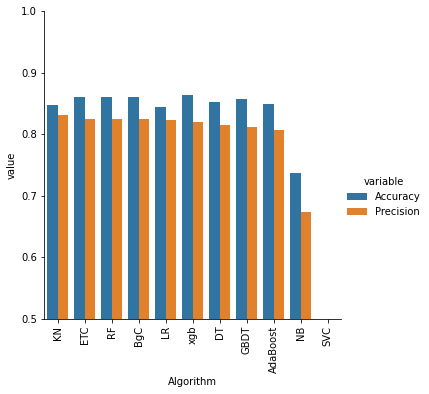

In [ ]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier(estimators=clf,final_estimator = lr)
score = cross_val_score(stack_model,X,y,cv = 5)
print("The accuracy score of is:",score.mean())

In [ ]:
score = accuracy_score(y_test,y_pred)
print(score)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True
)
plt.title("Confusion Matrix")
cm

# ROC_AUC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

# classification Report

In [ ]:
print(classification_report(y_test, y_pred))


# confusion matrix

In [ ]:
C = np.array(confusion_matrix(y_test, y_pred))


In [ ]:
pip install dgaintel

In [ ]:
from dgaintel import get_prediction

In [ ]:
get_prediction("microsoft.com")

microsoft.com is genuine with probability 0.0005084530566819012


In [ ]:
get_prediction("asdfasdfasdfjl.com")

asdfasdfasdfjl.com is DGA with probability 0.9487320184707642
